Análisis bajo riesgo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para ver la última versión online en `nbviewer`. 

---

A continuación se desarrolla el mismo caso anterior pero considerando que el precio y la producción son variables aleatorias.

In [9]:
import numpy.random as rdn
import cashflows as cf

In [10]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            costo,
            inversion):
    
    
    precio      = rdn.triangular(  8,  10,  12, 11).tolist()
    produccion  = rdn.triangular( 80, 100, 120, 11).tolist()
    
    
    ingre = cf.cashflow(const_value = 0, nper = 11, spec = [(t, precio[t] * produccion[t]) if t > 0 else (0,0) for t in range(11)])    
    opera = cf.cashflow(const_value = 0, nper = 11, spec = [(t, costo)                     if t > 0 else (0,0) for t in range(11)])
    inver = cf.cashflow(const_value = 0, nper = 11, spec = (0, inversion))
    
    asset = cf.cashflow(const_value=0, nper=11, spec=(0, inversion))
    life  = cf.cashflow(const_value=0, nper=11, spec=(0, 5))
    dep   = cf.depreciation_sl(costs = asset, life=life, noprint=True)
    
    antes = ingre - opera - inver - dep
    desp  = cf.after_tax_cashflow(antes, cf.interest_rate([30] * 11))
    
    neto  = antes + dep
    
    npv   = cf.timevalue(cflo=neto, prate=marr)
    
    return npv

In [11]:
marr = cf.interest_rate([10] * 11)
project(marr, 220, 2000)

2720.30248058103

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
result = []

for sim in range(1000):
    result.append(project(marr, 220, 2000))
result[1:10]

[2390.2804365004367,
 3173.0864980332544,
 2946.7347665913003,
 2632.2937151872343,
 2826.322498821684,
 2811.5834335874997,
 2278.660982966946,
 2637.0184150329555,
 2857.171723578801]

(array([  11.,   45.,  113.,  211.,  226.,  195.,  123.,   56.,   16.,    4.]),
 array([ 2152.64997667,  2291.95687908,  2431.26378149,  2570.5706839 ,
         2709.87758631,  2849.18448872,  2988.49139112,  3127.79829353,
         3267.10519594,  3406.41209835,  3545.71900076]),
 <a list of 10 Patch objects>)

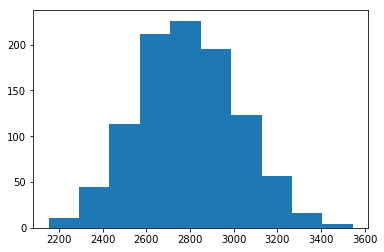

In [14]:
plt.hist(result)

**Ejercicio.--** Incluya en la simulación a las variables costo e inversión.

Análisis bajo riesgo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para ver la última versión online en `nbviewer`. 

---